# Import & Analyze Data

In [330]:
# warning off
import warnings
warnings.filterwarnings('ignore')

# Data wrangling & visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold

# Modelling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier     

# Model evaluation
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, roc_auc_score, f1_score, precision_score, recall_score

In [331]:
df = pd.read_csv('water_potability.csv')
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Not Potable: 0.6098901098901099
Potable: 0.3901098901098901


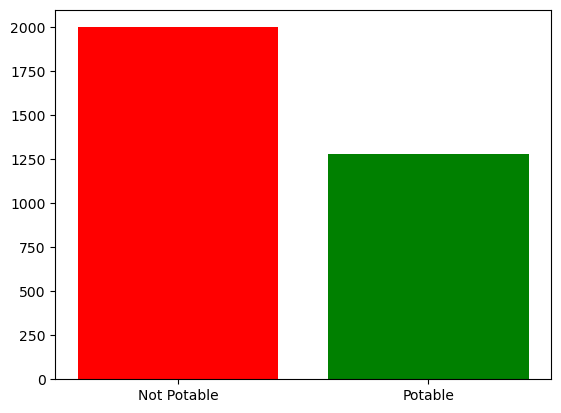

In [333]:
# Target variable distribution
plt.bar(['Not Potable', 'Potable'], df['Potability'].value_counts(), color=['red', 'green'])
print(f'Not Potable: {df.Potability.value_counts(normalize=True)[0]}')
print(f'Potable: {df.Potability.value_counts(normalize=True)[1]}')

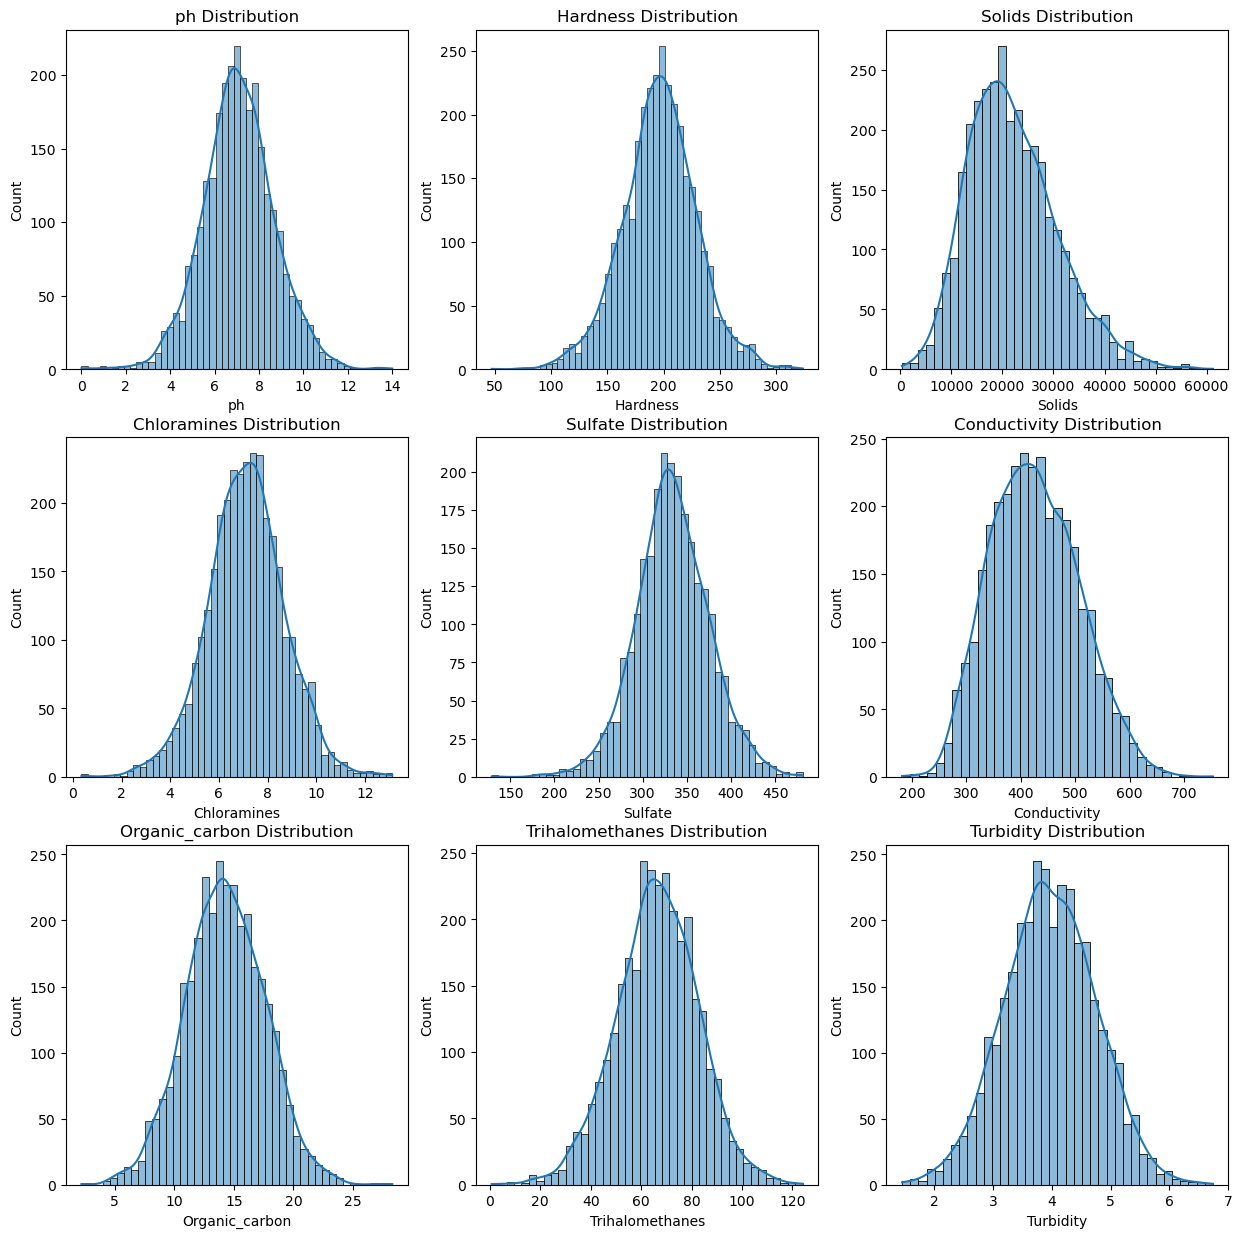

In [334]:
# Distribution for each feature

features = df.drop('Potability', axis=1).columns

fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, feature in enumerate(features):
    sns.histplot(df[feature], ax=ax[i//3, i%3], kde=True)
    ax[i//3, i%3].set_title(f'{feature} Distribution')

In [335]:
corr_matrix = df.corr()
corr_matrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


In [336]:
corr_matrix['Potability'].sort_values(ascending=False)

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.007130
Turbidity          0.001581
ph                -0.003556
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.023577
Organic_carbon    -0.030001
Name: Potability, dtype: float64

# Data Preprocessing

In [337]:
def print_null_report(df):
    for i, j in enumerate(df.isna().sum()):
        print(f'{df.columns[i]:15} | {j*100/len(df):.2f}%')

print_null_report(df)

ph              | 14.99%
Hardness        | 0.00%
Solids          | 0.00%
Chloramines     | 0.00%
Sulfate         | 23.84%
Conductivity    | 0.00%
Organic_carbon  | 0.00%
Trihalomethanes | 4.95%
Turbidity       | 0.00%
Potability      | 0.00%


In [338]:
# Handling missing value (gunakan imputasi untuk semuanya) berdasarkan class
df['ph'] = df.groupby('Potability')['ph'].transform(lambda x: x.fillna(x.mean()))
df['Sulfate'] = df.groupby('Potability')['Sulfate'].transform(lambda x: x.fillna(x.mean()))
df['Trihalomethanes'] = df.groupby('Potability')['Trihalomethanes'].transform(lambda x: x.fillna(x.mean()))

print_null_report(df)

ph              | 0.00%
Hardness        | 0.00%
Solids          | 0.00%
Chloramines     | 0.00%
Sulfate         | 0.00%
Conductivity    | 0.00%
Organic_carbon  | 0.00%
Trihalomethanes | 0.00%
Turbidity       | 0.00%
Potability      | 0.00%


In [339]:
# Handling Outlier

def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1

    outliers = df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))]
    return outliers
    
def print_outlier(df):
    for i in df.columns:
        outliers = check_outlier(df[i])
        print(f'Number of Outliers for {i:16}:  {len(outliers)}')
    
print_outlier(df)

Number of Outliers for ph              :  142
Number of Outliers for Hardness        :  83
Number of Outliers for Solids          :  47
Number of Outliers for Chloramines     :  61
Number of Outliers for Sulfate         :  264
Number of Outliers for Conductivity    :  11
Number of Outliers for Organic_carbon  :  25
Number of Outliers for Trihalomethanes :  54
Number of Outliers for Turbidity       :  19
Number of Outliers for Potability      :  0


In [340]:
def handle_outlier(df):
    for i in df.columns:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Drop the outliers
        lower_outliers = np.where(df[i] <= lower_bound)[0]
        upper_outliers = np.where(df[i] >= upper_bound)[0]
        df.drop(index = upper_outliers, inplace = True)
        df.drop(index = lower_outliers, inplace = True)
        df.reset_index(drop=True, inplace=True)
        print(f'Column {i} has been processed')

handle_outlier(df)

Column ph has been processed
Column Hardness has been processed
Column Solids has been processed
Column Chloramines has been processed
Column Sulfate has been processed
Column Conductivity has been processed
Column Organic_carbon has been processed
Column Trihalomethanes has been processed
Column Turbidity has been processed
Column Potability has been processed


In [356]:
X = df.drop(['Potability'], axis = 1)
y = df['Potability']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size= 0.25, stratify= y)

# Smote (only oversample the training data)
from imblearn.under_sampling import RandomUnderSampler
sm = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1992, 9), (665, 9), (1992,), (665,))

In [342]:
print(f'Distribusi target variable di train dan test set:{sum(y_train)/len(y_train), sum(y_test)/len(y_test)}')

Distribusi target variable di train dan test set:(0.37349397590361444, 0.3744360902255639)


In [357]:
# Data Scaling
mm = MinMaxScaler()

X_train_scaled = mm.fit_transform(X_train)
X_test_scaled = mm.transform(X_test)

X_train_resampled_scaled = mm.fit_transform(X_train_resampled)

# Modelling

In [344]:
# create class_weight for XGBoost
n_samples = len(y)
n_classes = len(np.unique(y))

count_pos_class = np.sum(y == 1)

# Calculate scale_pos_weight
scale_pos_weight = n_samples / (n_classes * count_pos_class)

In [345]:
# Set up all the models that will be used
knn = KNeighborsClassifier(weights='distance')
lr = LogisticRegression(class_weight='balanced', random_state=42)
svc = SVC(class_weight='balanced',random_state=42)
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
xgb = XGBClassifier(objective='binary:logistic', seed=42, use_label_encoder=False, scale_pos_weight=scale_pos_weight)

# using cross validation to evaluate the model where each fold is stratified
skf = StratifiedKFold(n_splits=5)

In [376]:
# K-NN param RandomizedSearch

params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2, 3]
}

# Instantiate cross validated k-nearest neighbors random search
rs_knn = RandomizedSearchCV(knn, params, cv=skf, n_jobs=-1, verbose=1, random_state=42)

# fit knn to training data
rs_knn.fit(X_train_scaled, y_train)
y_pred_knn = rs_knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred_knn))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

           0       0.66      0.82      0.73       416
           1       0.49      0.30      0.37       249

    accuracy                           0.62       665
   macro avg       0.58      0.56      0.55       665
weighted avg       0.60      0.62      0.60       665



In [377]:
# Logistic Regression param RandomizedSearch

params = {
    'penalty': ['l1', 'l2'], 
    # 'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Instantiate cross validated logistic regression random search
rs_lr = RandomizedSearchCV(lr, params, cv=skf, n_jobs=-1, verbose=1, random_state=42)

# fit knn to training data
rs_lr.fit(X_train_scaled, y_train)
y_pred_lr = rs_lr.predict(X_test_scaled)
print(classification_report(y_test, y_pred_lr))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

           0       0.58      0.46      0.52       416
           1       0.33      0.44      0.38       249

    accuracy                           0.45       665
   macro avg       0.45      0.45      0.45       665
weighted avg       0.49      0.45      0.46       665



In [348]:
# Support Vector Classifier param RandomizedSearch

params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1, 10, 100]
}

# Instantiate cross validated Support Vector Classifier random search
rs_svc = RandomizedSearchCV(svc, params, cv=skf, n_jobs=-1, verbose=1, random_state=42)

# fit knn to training data
rs_svc.fit(X_train_scaled, y_train)
y_pred_svc = rs_svc.predict(X_test_scaled)
print(classification_report(y_test, y_pred_svc))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

           0       0.69      0.70      0.70       416
           1       0.49      0.48      0.49       249

    accuracy                           0.62       665
   macro avg       0.59      0.59      0.59       665
weighted avg       0.62      0.62      0.62       665



In [384]:
# Decision Tree param RandomizedSearch

params = {
    'max_depth': [None, 3, 5, 10, 20, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 12]
}

# Instantiate cross validated Decision Tree random search
rs_dt = RandomizedSearchCV(dt, params, cv=skf, n_jobs=-1, verbose=1, random_state=42)

# fit knn to training data
rs_dt.fit(X_train_scaled, y_train)
y_pred_dt = rs_dt.predict(X_test_scaled)
print(classification_report(y_test, y_pred_dt))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       416
           1       0.69      0.67      0.68       249

    accuracy                           0.76       665
   macro avg       0.75      0.74      0.75       665
weighted avg       0.76      0.76      0.76       665



In [385]:
# XGBoostClassifier param RandomizedSearch

params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'n_estimators': [50, 100, 150, 200, 250, 300]
}

# Instantiate cross validated XGBoostClassifier random search
rs_xgb = RandomizedSearchCV(xgb, params, cv=skf, n_jobs=-1, verbose=1, random_state=42)

# fit knn to training data
rs_xgb.fit(X_train_scaled, y_train, early_stopping_rounds=10, eval_metric='aucpr', eval_set = [(X_test_scaled, y_test)])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	validation_0-aucpr:0.78801
[1]	validation_0-aucpr:0.78119
[2]	validation_0-aucpr:0.78121
[3]	validation_0-aucpr:0.77941
[4]	validation_0-aucpr:0.78345
[5]	validation_0-aucpr:0.78575
[6]	validation_0-aucpr:0.78489
[7]	validation_0-aucpr:0.78550
[8]	validation_0-aucpr:0.78798
[9]	validation_0-aucpr:0.78868
[10]	validation_0-aucpr:0.79047
[11]	validation_0-aucpr:0.79033
[12]	validation_0-aucpr:0.79057
[13]	validation_0-aucpr:0.79192
[14]	validation_0-aucpr:0.79183
[15]	validation_0-aucpr:0.79101
[16]	validation_0-aucpr:0.79156
[17]	validation_0-aucpr:0.79062
[18]	validation_0-aucpr:0.79535
[19]	validation_0-aucpr:0.79838
[20]	validation_0-aucpr:0.79970
[21]	validation_0-aucpr:0.80127
[22]	validation_0-aucpr:0.80121
[23]	validation_0-aucpr:0.80103
[24]	validation_0-aucpr:0.80142
[25]	validation_0-aucpr:0.80271
[26]	validation_0-aucpr:0.80364
[27]	validation_0-aucpr:0.80437
[28]	validation_0-aucpr:0.80527
[29]	validation_0-auc

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           impor...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   random_state=42, verbose=1)

<Axes: title={'center': 'Model Comparison for Prediction Accuracy'}>

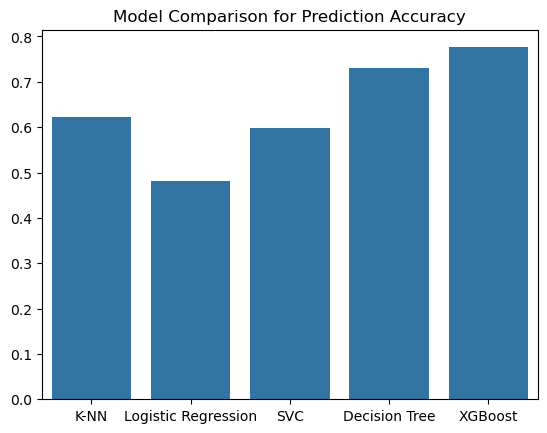

In [351]:
plt.title('Model Comparison for Prediction Accuracy')
sns.barplot(x=['K-NN', 'Logistic Regression', 'SVC', 'Decision Tree', 'XGBoost'], 
            y=[rs_knn.best_score_, rs_lr.best_score_, rs_svc.best_score_, rs_dt.best_score_, rs_xgb.best_score_])

In [386]:
y_pred = rs_xgb.predict(X_test_scaled)
# evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.51      0.64       416
           1       0.51      0.86      0.64       249

    accuracy                           0.64       665
   macro avg       0.69      0.69      0.64       665
weighted avg       0.73      0.64      0.64       665



In [353]:
print(f'Training score : {round(rs_xgb.score(X_train_scaled, y_train), 4)}')
print(f'Testing score  : {round(rs_xgb.score(X_test_scaled, y_test), 4)}')
print(f'Weighted Precision score: {round(precision_score(y_test, y_pred, average="weighted"), 4)}')
print(f'Weighted Recall score: {round(recall_score(y_test, y_pred, average="weighted"), 4)}')
print(f'Weighted f1 score: {round(f1_score(y_test, y_pred, average="weighted"), 4)}')
print(f'ROC - AUC score: {round(roc_auc_score(y_test, y_pred), 4)}')

Training score : 0.8228
Testing score  : 0.7985
Weighted Precision score: 0.7972
Weighted Recall score: 0.7985
Weighted f1 score: 0.7932
ROC - AUC score: 0.7656


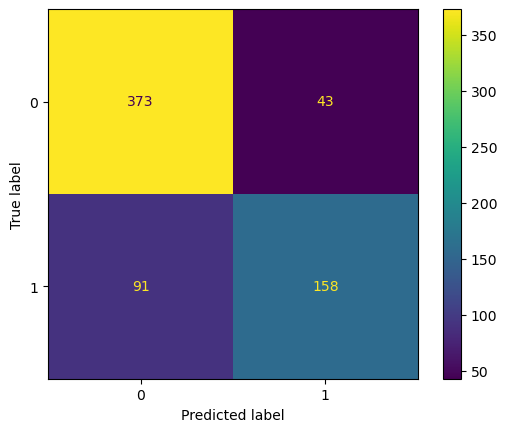

In [354]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [355]:
# Exporting the scaler and model
import pickle as pkl
pkl.dump(rs_xgb, open('xgb_model.pkl', 'wb'))
pkl.dump(mm, open('scaler.pkl', 'wb'))